# Домашнее задание 1. Анализ данных фондового рынка.
Выполнили Пасманик Ирина, Шарибжанова Диана 19ПМИ1



### Импорт библиотек и код для скачивания данных

In [1]:
!pip install yfinance > /dev/null

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math
import scipy
import scipy.stats

In [3]:
# TickersDataURL = '/content/drive/MyDrive/FOR/lab_1/tickers.csv'
# tickers = pd.read_csv(TickersDataURL, sep = ",")
# tickers = tickers['code'].tolist()
# # tickers

In [4]:
# start = datetime.datetime(2017, 1, 1)
# end = datetime.datetime(2017, 12, 31)

# data = pd.DataFrame()

# for i in tickers:  
#     print( str(tickers.index(i)) + str(' : ') + i + '.L', sep=',', end=',\n', flush=True)  
#     try:
#         stock = []
#         stock = yf.download(i + '.L',start=start, end=end, progress=False)
#         if len(stock) == 0:
#             None
#         else:
#             stock['Name']=i
#             data = data.append(stock,sort=False)
#     except Exception:
#         None

# index = yf.download('^FTSE',start=start, end=end, progress=False)

# data.to_csv('data.csv')
# index.to_csv('index.csv')

# t_len = len(tickers) - 1
# d_len = len(set(data['Name']))
# print(f'Всего найдено акций {t_len} из них скачано {d_len}')

### Задание 1
#### Собрать данные по дневным ценам активов (акций) и дневным объемам продаж на заданном фондовом рынке за указанный период. Добавить (если нет) данные по индексу рынка. Можно использовать yahoo finance.

In [5]:
data = pd.read_csv('/content/drive/MyDrive/FOR/lab_1/data.csv')
index = pd.read_csv('/content/drive/MyDrive/FOR/lab_1/index.csv')

data = data.drop(columns = ['Low', 'High', 'Open', 'Close'])
index = index.drop(columns = ['Low', 'High', 'Open', 'Close'])

In [6]:
adj_close = pd.DataFrame() # adjusted closing price
adj_close = data.drop(columns = ['Volume'])
adj_close = (adj_close.assign(idx=adj_close.groupby('Name').cumcount())
                 .pivot_table(index='Date', columns='Name', 
                              values='Adj Close', aggfunc='sum'))
adj_close.reset_index(level=0, inplace=True)

adj_close = adj_close.dropna(axis=1, how='any') # revome missing values

adj_close['FTSE'] = index['Adj Close'] # add the index data

adj_close

Name,Date,3IN,888,AAIF,AAL,AAS,ABD,ABDN,ABF,ACIC,...,WIZZ,WKP,WPP,WTAN,WTB,WWH,XAR,XPP,ZTF,FTSE
0,2017-01-03 00:00:00+00:00,172.189072,184.556702,155.156738,943.039978,173.248001,174.362167,432.914215,2547.093262,518.50,...,1799.0,644.872253,1422.120850,179.512360,3026.319336,2103.442139,378.464264,1524.751831,235.341461,7177.899902
1,2017-01-04 00:00:00+00:00,171.820251,184.979050,156.344162,927.214600,173.881607,175.619873,432.342804,2452.199951,519.75,...,1840.0,654.948364,1411.990723,177.926392,3065.539062,2127.254639,371.591736,1524.313965,230.869965,7189.700195
2,2017-01-05 00:00:00+00:00,172.466064,184.556702,159.510651,929.243408,175.239380,176.079590,415.085693,2522.665283,522.25,...,1861.0,663.765076,1426.017212,178.124649,3122.367676,2151.067139,381.545074,1515.553467,225.927811,7195.299805
3,2017-01-06 00:00:00+00:00,172.374207,183.923233,158.718979,921.127869,175.601425,177.688690,416.000000,2494.479248,522.50,...,1854.0,670.062744,1433.809570,178.620255,3154.383301,2171.903320,390.906006,1533.074219,232.988037,7210.100098
4,2017-01-09 00:00:00+00:00,172.189072,187.090683,160.302246,936.953430,177.230713,181.136688,412.000000,2506.693115,528.00,...,1843.0,651.589661,1453.290527,180.701859,3093.552979,2217.543945,395.527191,1567.240112,248.755920,7237.799805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2017-12-21 00:00:00+00:00,199.011124,251.318298,177.603516,1258.799805,191.832764,219.100128,489.942810,2664.424805,614.50,...,3528.0,849.394592,1086.972778,212.916931,3198.545898,2509.247803,362.619904,3095.399902,442.235687,7604.000000
248,2017-12-22 00:00:00+00:00,198.051163,250.337616,178.017532,1253.787964,192.109436,220.381393,489.600006,2686.342285,615.00,...,3495.0,852.868469,1089.402588,213.511673,3237.912598,2504.287109,363.836792,3074.643311,438.641266,7592.700195
249,2017-12-27 00:00:00+00:00,198.627441,251.853180,178.845520,1273.000000,191.279388,221.313248,495.200012,2701.589600,615.00,...,3572.0,862.422180,1086.162964,214.106430,3247.754150,2522.146240,373.328186,3095.399902,433.728821,7620.700195
250,2017-12-28 00:00:00+00:00,199.683716,251.050858,180.294479,1284.276245,194.046204,221.313248,492.571411,2699.683594,619.50,...,3572.0,865.896118,1094.262451,213.908173,3249.394287,2506.271240,362.133179,3100.814453,436.125153,7622.899902


In [7]:
volume = pd.DataFrame() # sales volume
volume = data.drop(columns = ['Adj Close'])
volume = (volume.assign(idx=volume.groupby('Name').cumcount())
                 .pivot_table(index='Date', columns='Name', 
                              values='Volume', aggfunc='sum'))
volume.reset_index(level=0, inplace=True)

volume = volume.dropna(axis=1, how='any') # revome missing values

volume['FTSE'] = index['Volume'] # add the index data

volume

Name,Date,3IN,888,AAIF,AAL,AAS,ABD,ABDN,ABF,ACIC,...,WIZZ,WKP,WPP,WTAN,WTB,WWH,XAR,XPP,ZTF,FTSE
0,2017-01-03 00:00:00+00:00,288360.0,102669.0,247406.0,4478647.0,280560.0,34502.0,5121405.0,966825.0,20970.0,...,217995.0,210569.0,2579035.0,960215.0,770127.0,30042.0,24810.0,3091.0,8160.0,795658400
1,2017-01-04 00:00:00+00:00,436971.0,289895.0,237481.0,9676683.0,387735.0,84708.0,3170382.0,1514651.0,6965.0,...,487181.0,398385.0,3042536.0,1033910.0,616094.0,55596.0,51648.0,4060.0,9.0,742050400
2,2017-01-05 00:00:00+00:00,465492.0,281643.0,230640.0,6930729.0,254635.0,76997.0,7441861.0,1703751.0,0.0,...,270969.0,214508.0,2758867.0,1226395.0,951487.0,38330.0,32007.0,2920.0,15163.0,768721000
3,2017-01-06 00:00:00+00:00,496141.0,457808.0,151284.0,9027338.0,75615.0,54213.0,4477715.0,907832.0,5998.0,...,93232.0,197858.0,3829007.0,1053570.0,733613.0,38644.0,25099.0,1523.0,20102.0,694323700
4,2017-01-09 00:00:00+00:00,391179.0,566549.0,180452.0,7295529.0,175725.0,147385.0,3493770.0,406143.0,8140.0,...,141621.0,326186.0,3353269.0,916895.0,626668.0,51327.0,26033.0,7486.0,66440.0,705536400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2017-12-21 00:00:00+00:00,500962.0,403541.0,175792.0,6276855.0,71670.0,9585.0,4406772.0,774893.0,7813.0,...,97212.0,116067.0,4422273.0,548230.0,464962.0,86852.0,31079.0,2844.0,14389.0,621347000
248,2017-12-22 00:00:00+00:00,301283.0,124309.0,122575.0,1434836.0,78180.0,26810.0,1925261.0,406398.0,11154.0,...,54029.0,69127.0,3040492.0,307045.0,265335.0,52493.0,11573.0,1655.0,5411.0,243831300
249,2017-12-27 00:00:00+00:00,272751.0,393221.0,129393.0,4117784.0,140885.0,84029.0,3545148.0,552402.0,147176.0,...,125905.0,98253.0,4084558.0,717910.0,372933.0,49416.0,35762.0,1387.0,3345.0,458380900
250,2017-12-28 00:00:00+00:00,178133.0,207101.0,43934.0,3606687.0,315195.0,41343.0,1671740.0,401444.0,4307.0,...,82458.0,83412.0,2703286.0,568780.0,221404.0,25733.0,42106.0,6044.0,7293.0,311875400


In [ ]:
tickers = list(adj_close.columns)[1:] # creation of data tickers list
tickers

### Задание 2
#### Преобразовать данные по ценам в данные по доходностям (используйте логарифмическую доходность). Вычислите оценки ожидаемых доходностей и стандартных отклонений и постройте «карту» активов в системе координат (σ, E). 

In [9]:
log_returns = pd.DataFrame()
log_returns['Date'] = adj_close['Date']

days = len(log_returns['Date'])
for ticker in tickers:
    for i in range(1, days):
        log_returns.loc[i, ticker] = np.log(adj_close.loc[i, ticker]/adj_close.loc[i-1, ticker])

log_returns = log_returns.drop([0])

log_returns

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


,Date,3IN,888,AAIF,AAL,AAS,ABD,ABDN,ABF,ACIC,...,WIZZ,WKP,WPP,WTAN,WTB,WWH,XAR,XPP,ZTF,FTSE
1,2017-01-04 00:00:00+00:00,-0.002144,0.002286,0.007624,-0.016924,0.003651,0.007187,-0.001321,-0.037967,0.002408,...,0.022535,0.015504,-0.007149,-0.008874,0.012876,0.011257,-0.018326,-0.000287,-0.019183,0.001643
2,2017-01-05 00:00:00+00:00,0.003752,-0.002286,0.020051,0.002186,0.007778,0.002614,-0.040734,0.028330,0.004798,...,0.011348,0.013372,0.009885,0.001114,0.018368,0.011132,0.026433,-0.005764,-0.021639,0.000779
3,2017-01-06 00:00:00+00:00,-0.000533,-0.003438,-0.004975,-0.008772,0.002064,0.009097,0.002200,-0.011236,0.000479,...,-0.003769,0.009443,0.005450,0.002778,0.010201,0.009640,0.024238,0.011494,0.030772,0.002055
4,2017-01-09 00:00:00+00:00,-0.001075,0.017075,0.009926,0.017035,0.009236,0.019219,-0.009662,0.004884,0.010471,...,-0.005951,-0.027956,0.013495,0.011586,-0.019473,0.020796,0.011752,0.022041,0.065485,0.003834
5,2017-01-10 00:00:00+00:00,0.000000,0.017898,0.009828,0.069426,-0.004351,0.003800,0.002770,-0.001500,0.003781,...,-0.010911,0.003859,0.006946,0.002192,0.047002,0.018618,0.008353,-0.019188,0.002834,0.005195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2017-12-21 00:00:00+00:00,0.002900,-0.001418,-0.000583,0.011345,0.000000,0.002662,0.025037,-0.000715,-0.000407,...,0.011976,0.013900,-0.008163,0.001864,0.007722,0.007541,-0.014657,0.000000,0.005161,0.010417
248,2017-12-22 00:00:00+00:00,-0.004835,-0.003910,0.002328,-0.003989,0.001441,0.005831,-0.000700,0.008192,0.000813,...,-0.009398,0.004081,0.002233,0.002789,0.012233,-0.001979,0.003350,-0.006728,-0.008161,-0.001487
249,2017-12-27 00:00:00+00:00,0.002906,0.006036,0.004640,0.015207,-0.004330,0.004219,0.011373,0.005660,0.000000,...,0.021792,0.011140,-0.002978,0.002782,0.003035,0.007106,0.025752,0.006728,-0.011262,0.003681
250,2017-12-28 00:00:00+00:00,0.005304,-0.003191,0.008069,0.008819,0.014361,0.000000,-0.005322,-0.000706,0.007290,...,0.000000,0.004020,0.007429,-0.000926,0.000505,-0.006314,-0.030446,0.001748,0.005510,0.000289


In [10]:
ratings = pd.DataFrame(columns=['mean', 'std'], index=tickers)

for ticker in tickers:
    mean = np.mean(log_returns[ticker])
    std = np.std(log_returns[ticker])
    ratings['mean'][ticker] = mean
    ratings['std'][ticker] = std

index_mean = ratings['mean']['FTSE']
index_std = ratings['std']['FTSE']

ratings = ratings.drop('FTSE')
ratings

,mean,std
3IN,0.000592,0.006095
888,0.001227,0.014212
AAIF,0.000603,0.007384
AAL,0.001261,0.020257
AAS,0.000467,0.005515
...,...,...
WTB,0.000321,0.013257
WWH,0.000708,0.009716
XAR,-0.0002,0.022288
XPP,0.002821,0.016137


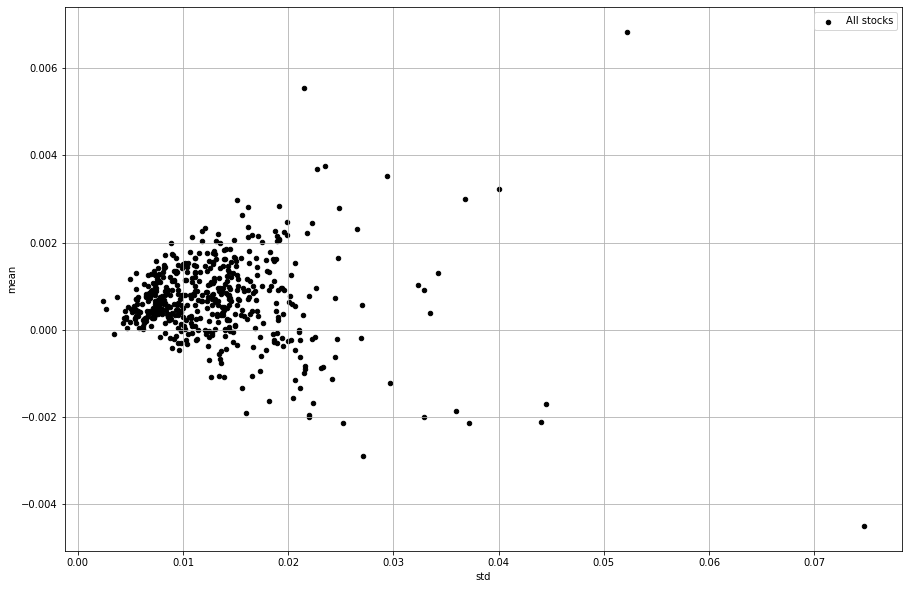

In [11]:
ratings.plot(x='std', y='mean', kind="scatter", label='All stoсks', figsize=(15,10), grid='On', color='black')
plt.legend()
plt.show()

* Большая часть активов имеют малую доходностью и малую степень риска
* С увеличением доходности заметно растет риск
* Часть активов имеют отрицательную доходность
* Нет безрисковых акций

### Задание 3
#### Рассмотрите портфель с равными долями капитала и отметьте его на карте активов в системе координат   (σ, E).  Дайте характеристику этому портфелю.
 

In [12]:
portfolio_mean = 0
portfolio_std = 0
n = len(tickers)

e_sum = 0
for i in range(n-1):
     e_sum += ratings['mean'][tickers[i]]
portfolio_mean = e_sum/n

s_sum = 0
for i in range(1, n-1):
    for j in range(i, n):
        s_sum += (np.cov(log_returns[tickers[i]].astype(float), log_returns[tickers[j]].astype(float))[0][1])/n**2
portfolio_std = math.sqrt(s_sum)

print(f'Доходность портфеля с равными долями: {portfolio_mean}')
print(f'Риск портфеля с равными долями: {portfolio_std}')

Доходность портфеля с равными долями: 0.0006811721734124233
Риск портфеля с равными долями: 0.0025243504735404476


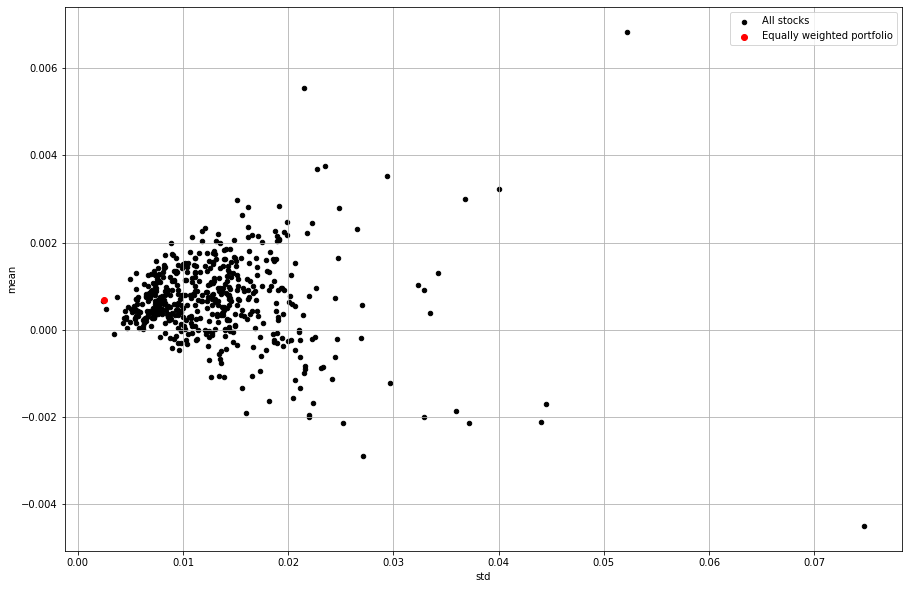

In [13]:
ratings.plot(x='std', y='mean', kind="scatter", label='All stoсks', figsize=(15,10), grid='On', color='black')
plt.scatter(portfolio_std, portfolio_mean, color="red", label='Equally weighted portfolio')
plt.legend()
plt.show()

Портфель с равными долями имеет очень маленький риск, однако его доходность также крайне небольшая.

### Задание 4
#### Рассмотрите индекс рынка и отметьте его на карте активов в системе координат   (σ,E). Дайте характеристику индексу рынка.  


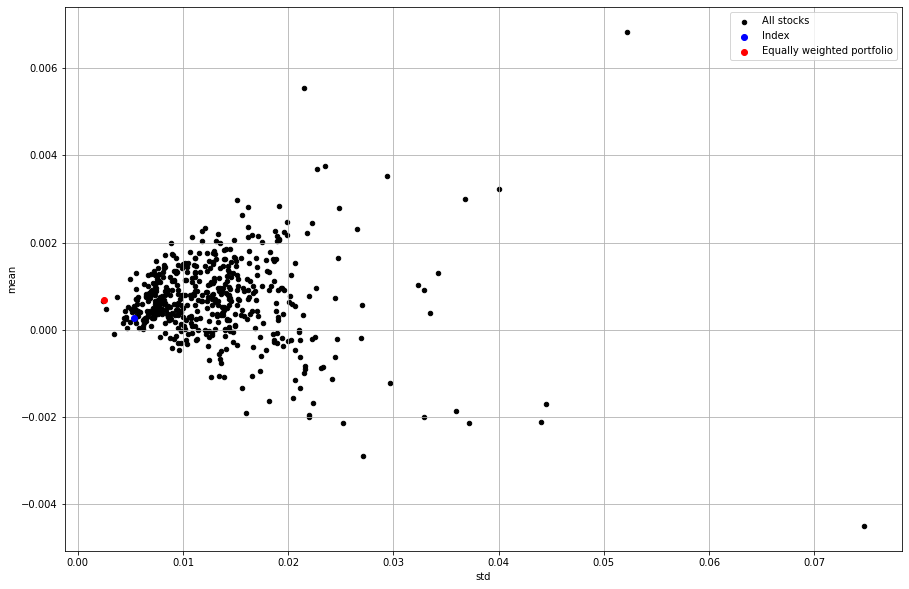

In [14]:
ratings.plot(x='std', y='mean', kind="scatter", label='All stoсks', figsize=(15,10), grid='On', color='black')
plt.scatter(index_std, index_mean, color="blue", label='Index')
plt.scatter(portfolio_std, portfolio_mean, color="red", label='Equally weighted portfolio')
plt.legend()
plt.show()

Можно заметить, что по сравнению с портфелем с равынми долями капитала, индекс рынка имеет больший риск и меньшую доходность (т.е. хуже по обоим пармаметрам)

### Задание 5
#### Задайте уровень риска и оцените VaR (Value at Risk = Сумма под Риском для случайных величин Потери = - Доходности) для активов вашего рынка. Какой из активов наиболее предпочтителен по этой характеристике?  Где он расположен на карте активов? Дайте характеристику VaR портфеля с равными долями и индекса рынка.


In [15]:
losses = -log_returns.drop(['Date'], axis=1)
eqw_portfolio_losses = [-i for i in ratings['mean']]

In [16]:
VaR_90 = np.quantile(losses, q=0.9, axis=0)
VaR_90 = pd.DataFrame(columns = tickers, data=[VaR_90])
del VaR_90['FTSE']
VaR_90

,3IN,888,AAIF,AAL,AAS,ABD,ABDN,ABF,ACIC,ADIG,...,WIN,WIZZ,WKP,WPP,WTAN,WTB,WWH,XAR,XPP,ZTF
0,0.00571,0.012632,0.007101,0.025513,0.006823,0.008696,0.016089,0.014892,0.005719,0.007483,...,0.01695,0.014336,0.012987,0.014229,0.006644,0.012306,0.01115,0.020305,0.015016,0.016394


In [17]:
VaR_95 = np.quantile(losses, q=0.95, axis=0)
VaR_95 = pd.DataFrame(columns = tickers, data=[VaR_95])
del VaR_95['FTSE']
VaR_95

,3IN,888,AAIF,AAL,AAS,ABD,ABDN,ABF,ACIC,ADIG,...,WIN,WIZZ,WKP,WPP,WTAN,WTB,WWH,XAR,XPP,ZTF
0,0.008,0.017327,0.011574,0.031833,0.00833,0.013095,0.021481,0.021373,0.008218,0.009856,...,0.023681,0.024207,0.01827,0.020273,0.008086,0.017207,0.014351,0.029013,0.019248,0.022181


In [18]:
VaR_99 = np.quantile(losses, q=0.99, axis=0)
VaR_99 = pd.DataFrame(columns = tickers, data=[VaR_99])
del VaR_99['FTSE']
VaR_99

,3IN,888,AAIF,AAL,AAS,ABD,ABDN,ABF,ACIC,ADIG,...,WIN,WIZZ,WKP,WPP,WTAN,WTB,WWH,XAR,XPP,ZTF
0,0.011354,0.043978,0.019524,0.044856,0.0118,0.021551,0.038345,0.038038,0.014956,0.016455,...,0.045856,0.04912,0.028296,0.030756,0.014275,0.034467,0.029122,0.056793,0.026929,0.033183


In [19]:
best_stock_90 = VaR_90.loc[0].idxmin()
best_stock_90_score = VaR_90.loc[0].min()

best_stock_95 = VaR_95.loc[0].idxmin()
best_stock_95_score = VaR_95.loc[0].min()

best_stock_99 = VaR_99.loc[0].idxmin()
best_stock_99_score = VaR_99.loc[0].min()

In [20]:
print(best_stock_90, best_stock_90_score)
print(best_stock_95, best_stock_95_score)
print(best_stock_99, best_stock_99_score)

HONY 0.0
HONY -0.0
MWY 0.004935955901738516


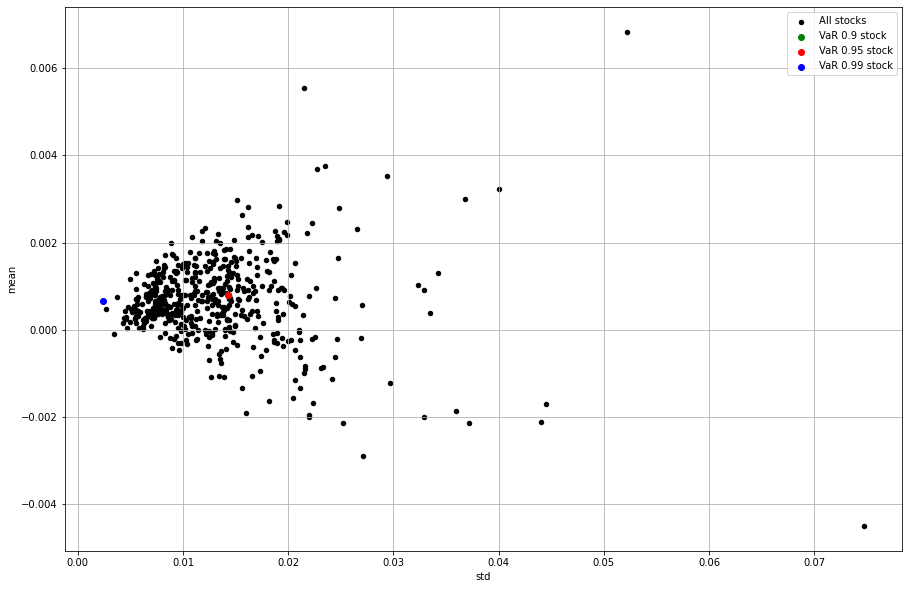

In [21]:
ratings.plot(x='std', y='mean', kind="scatter", label='All stoсks', figsize=(15,10), grid='On', color='black')
plt.scatter(ratings['std'][best_stock_90], ratings['mean'][best_stock_90], color="green", label='VaR 0.9 stock')
plt.scatter(ratings['std'][best_stock_95], ratings['mean'][best_stock_95], color="red", label='VaR 0.95 stock')
plt.scatter(ratings['std'][best_stock_99], ratings['mean'][best_stock_99], color="blue", label='VaR 0.99 stock')
plt.legend()
plt.show()

In [22]:
VaR_eqw_90 = np.quantile(eqw_portfolio_losses, q=0.90)
VaR_eqw_95 = np.quantile(eqw_portfolio_losses, q=0.95)
VaR_eqw_99 = np.quantile(eqw_portfolio_losses, q=0.99)

print('VaR для портфеля с равными долями капитала:')
print(f'0.9:  {VaR_eqw_90}')
print(f'0.95: {VaR_eqw_95}')
print(f'0.95: {VaR_eqw_99}')

VaR для портфеля с равными долями капитала:
0.9:  0.00027556726633748825
0.95: 0.0008945702816683785
0.95: 0.001999466645161148


In [23]:
VaR_idx_90 = np.quantile(losses['FTSE'], q=0.90)
VaR_idx_95 = np.quantile(losses['FTSE'], q=0.95)
VaR_idx_99 = np.quantile(losses['FTSE'], q=0.99)

print('VaR для портфеля с равными долями капитала:')
print(f'0.9:  {VaR_idx_90}')
print(f'0.95: {VaR_idx_95}')
print(f'0.95: {VaR_idx_99}')

VaR для портфеля с равными долями капитала:
0.9:  0.006287899517688559
0.95: 0.008840434975862496
0.95: 0.013012246484140205


### Задание 6
#### Выберите несколько интересных (значимых)  активов рынка.   Можно ли считать наблюдаемые доходности (объемы продаж) конкретного актива повторной выборкой из некоторого распределения (белый шум)?  Поищите научные подходы к ответу на этот вопрос (проверка гипотезы о случайности, Ивченко Г.И. Медведев Ю.И. Введение в математическую статистику)


**Рассматриваемые активы:**

ULVR (Unilever)

GSK (GlaxoSmithKline)

RIO (Rio Tinto Group)

CNA (Centrica)

SBRY (J. Sainsbury)

**Критерий инверсий:**

Если временной ряд длины $n$ состоит из независимых случайных величин, то число инверсий является случайной
величиной с математическим ожиданием и дисперсией следующего вида:

$E(A) = \frac{n(n-1)}{4}$

$D(A) = \frac{n(2n+5)(n-1)}{72}$

Если

$\frac{|A - E(A)|}{\sqrt{D(A)}} > z_{1 - \frac{1}{\alpha}}$ (где $z_{1 - \frac{1}{\alpha}}$ - квантиль стандартного нормального распределения),

то гипотеза $H_0$ отклоняется 


In [24]:
def inversion(name, log_returns):
  alpha = 0.05
  n = log_returns.shape[0]    
  inv_count = 0
  for i in range(1, n):
      for j in range(i+1, n+1): 
          if log_returns[i] > log_returns[j]:
              inv_count += 1
  
  mu = (n*(n - 1))/4
  s2 = (2*n**2 + 3*n**2 - 5*n)/72
  
  inv_norm_distr = abs((n - mu)/math.sqrt(s2))
  
  if inv_norm_distr < scipy.stats.norm.ppf(1 - (alpha/2)):
      print(f"Критерий инверсии: гипотеза подтверджается")
  else:
      print(f"Критерий инверсии: гипотеза отвергается")

**Критерий автокорреляциии:**

Если выборка $(x_1, x_2, ..., x_n)$ размера $n$ случайна, то значения каждого ее элемента не должно зависеть от величины предшествующего и последующего членов. Для проверки этой независимостии используется следующая статистика:

$A = \frac{n\sum_{i=1}^{n-1}{x_ix_{i+1}}  -  (\sum_{i=1}^{n}{x_i})^2 + nx_1x_n}{n\sum_{i=1}^{n}{x_i^2}  -  (\sum_{i=1}^{n}{x_i})^2} $

$E(A) = - \frac{1}{n-1}$

$D(A) = - \frac{n(n-3)}{(n+1)(n-1)^2} $

Применяя критерий, используют нормализованную статистику

$A^* = \frac{A - E(A)}{\sqrt{D(A)}}$

Если

$\frac{|A - E(A)|}{\sqrt{D(A)}} > z_{1 - \frac{1}{\alpha}}$ (где $z_{1 - \frac{1}{\alpha}}$ - квантиль стандартного нормального распределения),

то гипотеза $H_0$ отклоняется

In [25]:
def autocorrelation(name, log_returns):
  alpha = 0.05
  n = log_returns.shape[0]
  
  sum_xi_xi1 = 0 # sum of x_i*x_{i+1}
  sum_xi = 0 # sum of x_i
  sum_xi_sq = 0 # sum of x_{i}^{2}
  for i in range(1, n):
      sum_xi_xi1 += log_returns[i]*log_returns[i+1] 
  for i in range(1, n+1):
      sum_xi += log_returns[i]
      sum_xi_sq += log_returns[i]**2
          
  A = ((n*sum_xi_xi1 - sum_xi**2 + n*log_returns[1]*log_returns[n]) / (n*sum_xi_sq - sum_xi**2))
  
  e = -(1/(n - 1)) # expected_value
  s = ((n*(n-3))/((n+1)*(n-1)**2)) # variance
  A_ = (A - e)/(math.sqrt(s)) # A*
  
  if A_ < scipy.stats.norm.ppf(1 - (alpha/2)):
      print(f"Критерий автокорреляции: гипотеза подтверджается")
  else:
      print(f"Критерий автокорреляции: гипотеза отвергается")
                          

In [26]:
tickers_list = ['ULVR', 'GSK', 'RIO', 'CNA', 'SBRY']
for ticker in tickers_list:
  print(ticker)
  inversion(ticker, log_returns[ticker])
  autocorrelation(ticker, log_returns[ticker])
  print()

ULVR
Критерий инверсии: гипотеза отвергается
Критерий автокорреляции: гипотеза подтверджается

GSK
Критерий инверсии: гипотеза отвергается
Критерий автокорреляции: гипотеза отвергается

RIO
Критерий инверсии: гипотеза отвергается
Критерий автокорреляции: гипотеза подтверджается

CNA
Критерий инверсии: гипотеза отвергается
Критерий автокорреляции: гипотеза подтверджается

SBRY
Критерий инверсии: гипотеза отвергается
Критерий автокорреляции: гипотеза подтверджается



### Задание 7
#### Выберите несколько интересных (значимых)  активов рынка из разных производственных секторов.   В предположении, что наблюдаемые доходности (объемы продаж) являются повторной выборкой из некоторого распределения исследовать (выборочно) распределения доходностей и объемов продаж выбранных активов. Сделать выводы. 


**Рассматриваемые активы:**

IAG (International Airlines Group) - авиационная компания

VOD (Vodafone Group) - оператор сотовой связи

TSCO (Tesco) - розничная сеть магазинов

BP (British Petroleum) - нефтегазовая компания

CPG (Compass Group) - сеть корпоративных столовых

In [27]:
def tests(idx, param):
  alpha = 0.05
  if param == 'log_returns':
      ticker = log_returns[idx].to_list()
  else:
      ticker = volume[idx].to_list()

  shapiro_test = scipy.stats.shapiro(ticker)
  if shapiro_test.pvalue < alpha:
      print(f'Тест Шапиро-Уилка:         гипотеза опровергается, p-value: {shapiro_test.pvalue}')
  else:
      print(f'Тест Шапиро-Уилка:         гипотеза подтверждается, p-value: {shapiro_test.pvalue}')
  
  DA_test = scipy.stats.normaltest(ticker)
  if DA_test.pvalue  < alpha:
    print(f'Тест Д\'Агостино:           гипотеза опровергается, p-value: {DA_test.pvalue}')
  else:
    print(f'Тест Д\'Агостино:           гипотеза подтверждается, p-value: {DA_test.pvalue}')
  
  ks_test = scipy.stats.kstest(ticker, 'norm')
  if ks_test.pvalue  < alpha:
    print(f'Тест Колмогорова-Смирнова: гипотеза опровергается, p-value: {ks_test.pvalue}')
  else:
    print(f'Тест Колмогорова-Смирнова: гипотеза подтверждается, p-value: {ks_test.pvalue}')

  print()


In [28]:
tickers_list = ['IAG', 'VOD', 'TSCO', 'BP', 'CPG']

print('Проверка гипотез для доходностей:\n')
for ticker in tickers_list:
  print(ticker)
  tests(ticker, 'log_returns')

print()

print('Проверка гипотез для объемов продаж:\n')
for ticker in tickers_list:
  print(ticker)
  tests(ticker, 'volume')

Проверка гипотез для доходностей:

IAG
Тест Шапиро-Уилка:         гипотеза опровергается, p-value: 4.153683676122455e-06
Тест Д'Агостино:           гипотеза опровергается, p-value: 2.266850377191442e-05
Тест Колмогорова-Смирнова: гипотеза опровергается, p-value: 9.204285973176387e-54

VOD
Тест Шапиро-Уилка:         гипотеза опровергается, p-value: 1.2852891586589976e-06
Тест Д'Агостино:           гипотеза опровергается, p-value: 1.6566554583454173e-09
Тест Колмогорова-Смирнова: гипотеза опровергается, p-value: 2.4183626931819094e-55

TSCO
Тест Шапиро-Уилка:         гипотеза опровергается, p-value: 8.878993026928406e-12
Тест Д'Агостино:           гипотеза опровергается, p-value: 2.2908150949498325e-15
Тест Колмогорова-Смирнова: гипотеза опровергается, p-value: 7.010665834844674e-53

BP
Тест Шапиро-Уилка:         гипотеза опровергается, p-value: 5.680160757037811e-05
Тест Д'Агостино:           гипотеза опровергается, p-value: 4.512786586200706e-06
Тест Колмогорова-Смирнова: гипотеза опро

Распределения доходностей и распределения объемов продаж изучаемых активов из разных секторов не являются нормальными.

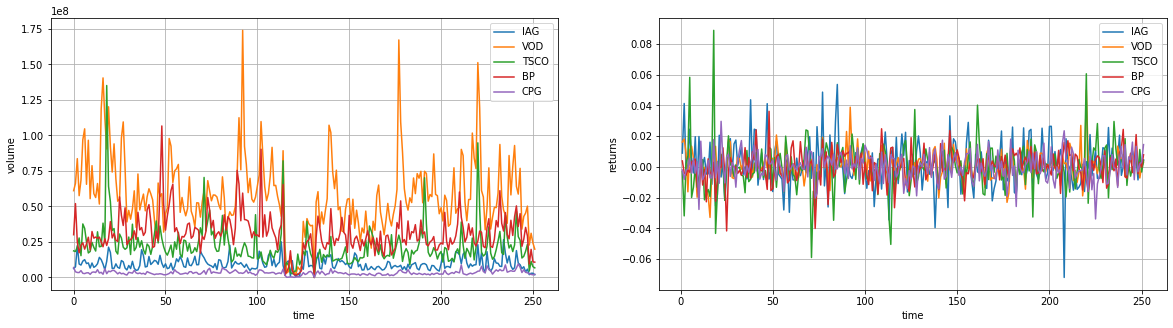

In [29]:
f = plt.figure(figsize=(20, 5))

plot_1 = f.add_subplot(121)
plot_1 = plt.grid()
plot_1 = plt.xlabel("time")
plot_1 = plt.ylabel("volume")
for ticker in tickers_list:
    idx = volume[ticker].to_list()
    periods = volume.index.to_list()
    plot_1 = plt.plot(periods, idx)
plot_1 = plt.legend(labels=tickers_list)

plot_2 = f.add_subplot(122)
plot_2 = plt.grid()
plot_2 = plt.xlabel("time")
plot_2 = plt.ylabel("returns")
for ticker in tickers_list:
    idx = log_returns[ticker].to_list()
    periods = log_returns.index.to_list()
    plot_2 = plt.plot(periods, idx)
plot_2 = plt.legend(labels=tickers_list)
plt.show()

Из графиков видно, что наибольшие объемы продаж имеет компания Vodafone.

### Задание 8
#### Исследовать зависимости (выборочно) между доходностями различных активов с помощью техники анализа зависимостей. Сделайте анализ зависимостей между парами активов для активов из одного производственного сектора и для активов из разных производственных секторов. Сделайте анализ зависимости (выборочно) между доходностями и объемами продаж одного актива. Рассмотрите активы из разных производственных секторов.

**Активы из одного производственнго сектора:**

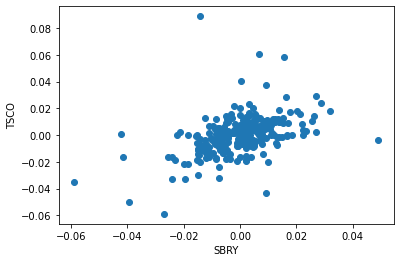

Коэффициент корреляции:  0.4523900789543926


In [30]:
plt.scatter(log_returns['SBRY'], log_returns['TSCO'])
plt.xlabel('SBRY')
plt.ylabel('TSCO')
plt.show()

print('Коэффициент корреляции: ' , np.corrcoef(log_returns['SBRY'].astype(float), log_returns['TSCO'].astype(float))[1][0])

Можно заметить, что существует некоторая зависимость между доходностями компаний из одного сектора. Коэффициент корреляции имеет относительно большое значение.

**Активы из разных производственных секторов:**

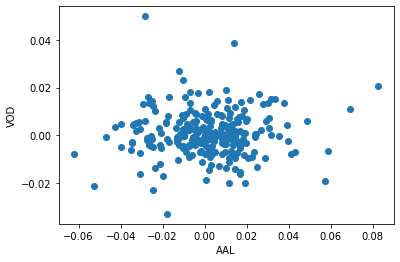

Коэффициент корреляции:  0.0472093637220445


In [31]:
plt.scatter(log_returns['AAL'], log_returns['VOD'])
plt.xlabel('AAL')
plt.ylabel('VOD')
plt.show()

print('Коэффициент корреляции: ' , np.corrcoef(log_returns['AAL'].astype(float), log_returns['VOD'].astype(float))[1][0])

В отличие от предыдущего случая, коэффициенты корреляции между доходностями компаний из разных секторов низкие. Зависимость между доходностями этих компаний очень маленькая.

**Доходность и объем продаж одного актива:**

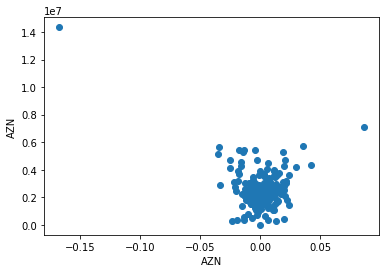

Коэффициент корреляции:  -0.28550177957847406


In [32]:
plt.scatter(log_returns['AZN'], volume['AZN'].drop(0))
plt.xlabel('AZN')
plt.ylabel('AZN')
plt.show()

print('Коэффициент корреляции: ' , np.corrcoef(log_returns['AZN'].astype(float), volume['AZN'].drop(0).astype(float))[1][0])

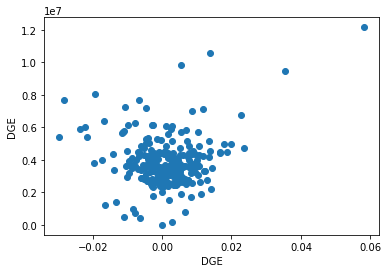

Коэффициент корреляции:  0.1283709187340037


In [33]:
plt.scatter(log_returns['DGE'], volume['DGE'].drop(0))
plt.xlabel('DGE')
plt.ylabel('DGE')
plt.show()

print('Коэффициент корреляции: ' , np.corrcoef(log_returns['DGE'].astype(float), volume['DGE'].drop(0).astype(float))[1][0])